In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn import preprocessing

In [ ]:
data=pd.read_csv('/content/forestfires (1).csv')

In [ ]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
data1=data.drop(columns=['monthjan','monthfeb','monthmar','monthapr','monthmay','monthjun','monthjul','monthaug','monthsep','monthoct','monthnov','monthdec',
                         'daysun','daymon','daytue','daywed','daythu','dayfri','daysat'],axis=1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [ ]:
data1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
data1[data1.duplicated()].count()

month            8
day              8
FFMC             8
DMC              8
DC               8
ISI              8
temp             8
RH               8
wind             8
rain             8
area             8
size_category    8
dtype: int64

In [ ]:
df=data1.drop_duplicates()

In [ ]:
df[df.duplicated()].count()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

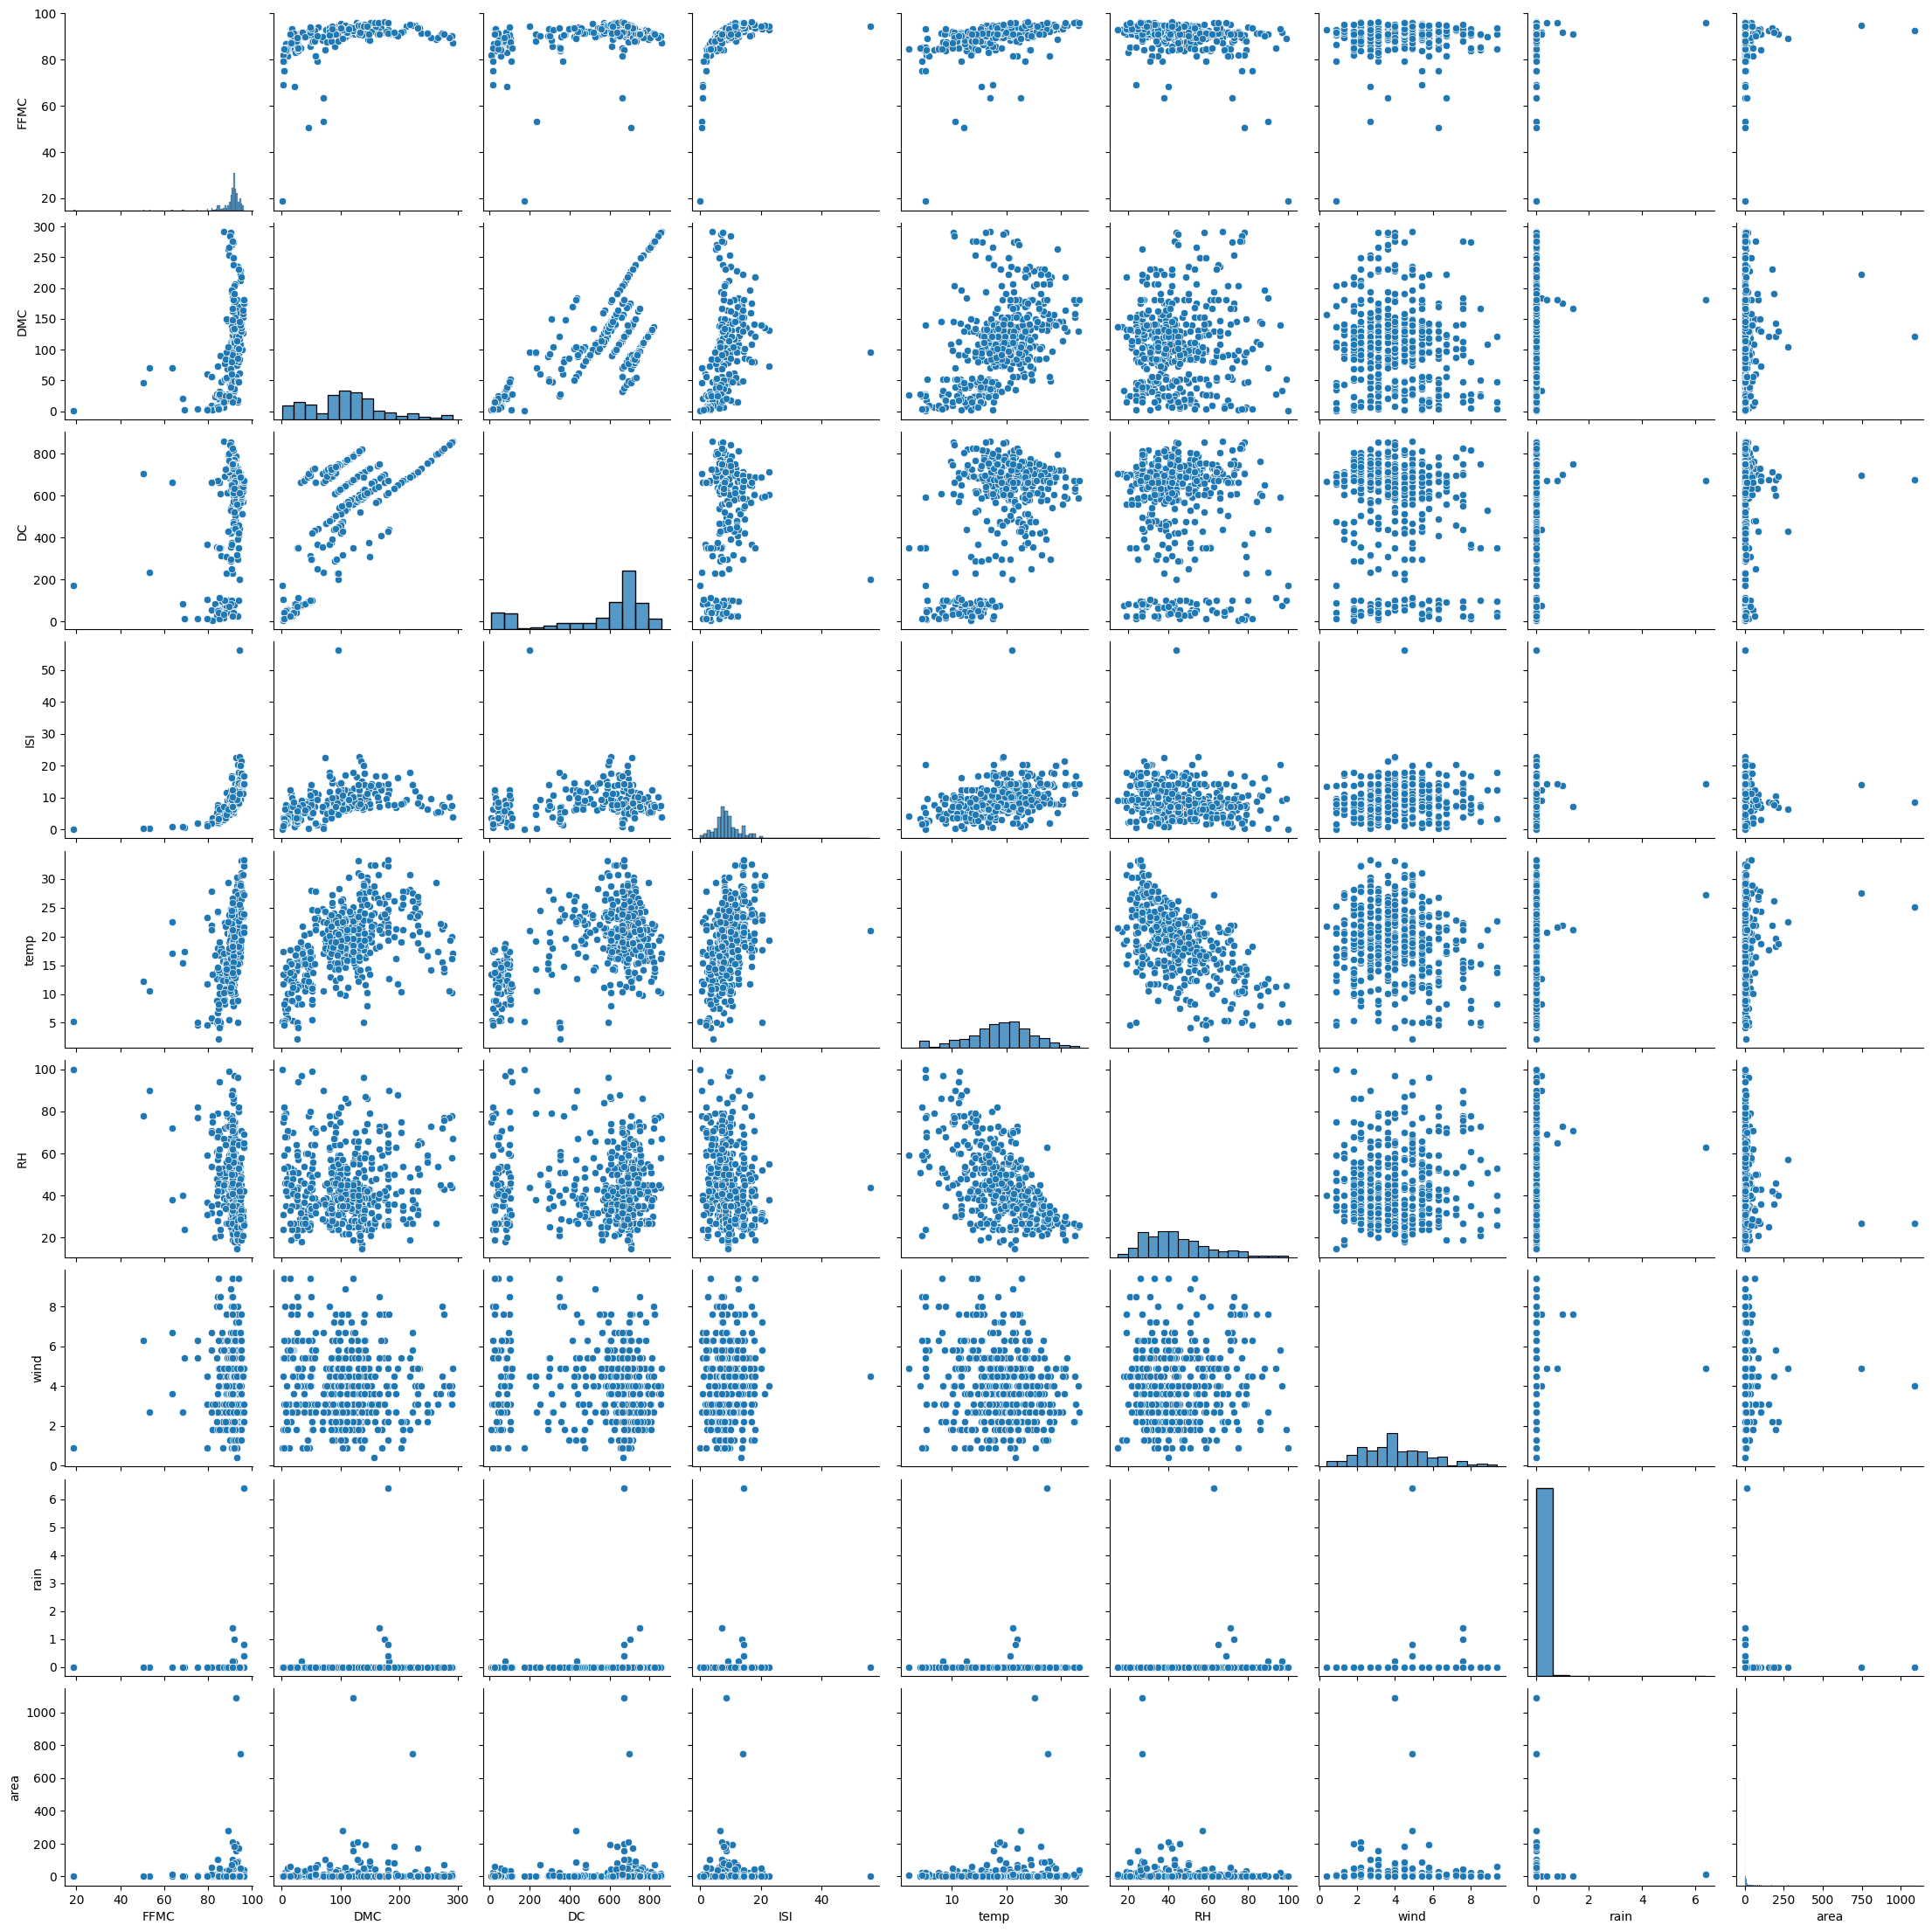

In [ ]:
sns.pairplot(df)

In [ ]:
cor = df.corr(method='pearson')
cor.style.background_gradient(cmap='coolwarm')

<ipython-input-12-db9fb0c97393>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr(method='pearson')


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

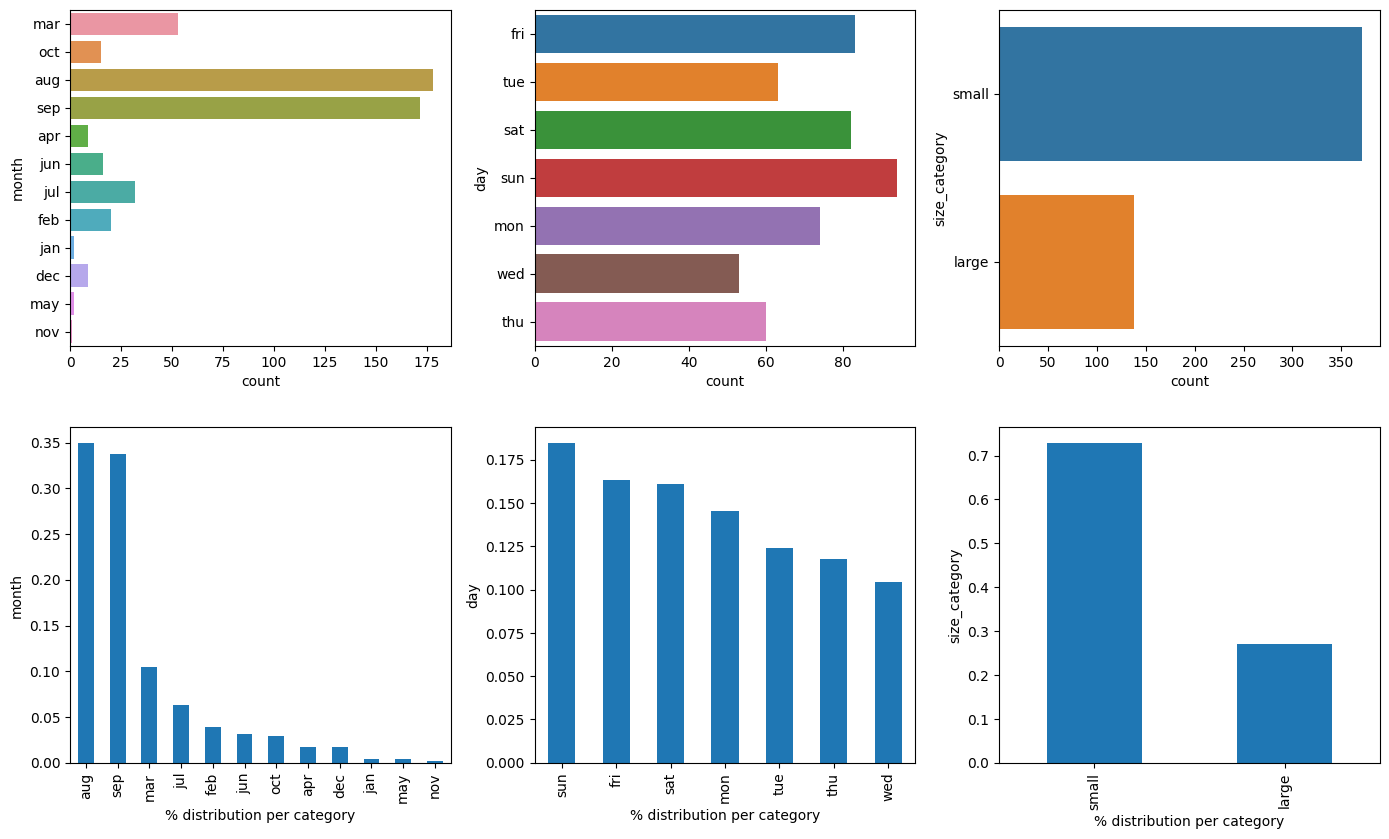

In [ ]:
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=df,y=col)
    plt.subplot(3,3,i+3)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

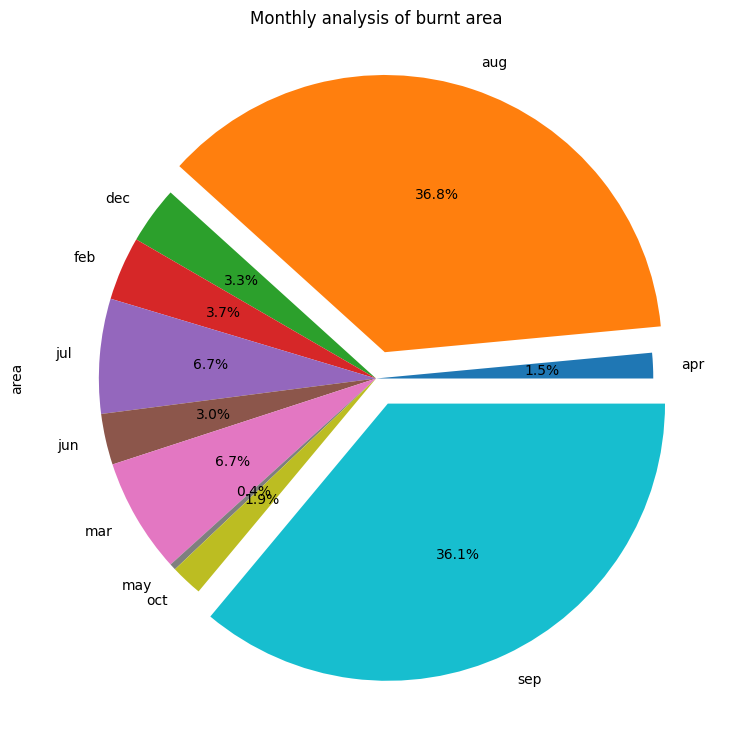

In [ ]:
areaburnt=df[df['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

In [ ]:
lab_enc=preprocessing.LabelEncoder()
y=lab_enc.fit_transform(df['size_category'])

In [ ]:
x=df.iloc[:,2:11]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
X_standardized = sc.transform(x)

In [ ]:
pip install scikeras

In [ ]:
from sklearn.model_selection import GridSearchCV,KFold
from keras.layers import Dense
from keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam

In [ ]:
def create_model():
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(8, input_dim=9, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    adam=Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
batch_size = [10,20,40]
epochs = [10,50,100]
model = KerasClassifier(build_fn = create_model,batch_size =batch_size,epochs =epochs)
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold())
grid_result = grid.fit(X_standardized,y)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


41/41 [==============================] - 1s 2ms/step - loss: 0.2348 - accuracy: 0.6511
Epoch 2/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.6732
Epoch 3/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8010
Epoch 4/10
41/41 [==============================] - 0s 3ms/step - loss: 0.1174 - accuracy: 0.8452
Epoch 5/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.9238
Epoch 6/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9582
Epoch 7/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9509
Epoch 8/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9337
Epoch 9/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9607
Epoch 10/10
11/11 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


41/41 [==============================] - 1s 3ms/step - loss: 0.2142 - accuracy: 0.7174
Epoch 2/10
41/41 [==============================] - 0s 3ms/step - loss: 0.1740 - accuracy: 0.7199
Epoch 3/10
41/41 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.7346
Epoch 4/10
41/41 [==============================] - 0s 3ms/step - loss: 0.1127 - accuracy: 0.8894
Epoch 5/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0893 - accuracy: 0.9140
Epoch 6/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0720 - accuracy: 0.9337
Epoch 7/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9484
Epoch 8/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9582
Epoch 9/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9681
Epoch 10/10
11/11 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


41/41 [==============================] - 1s 2ms/step - loss: 0.2087 - accuracy: 0.7690
Epoch 2/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.7838
Epoch 3/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.7838
Epoch 4/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1264 - accuracy: 0.7838
Epoch 5/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.8403
Epoch 6/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0878 - accuracy: 0.9042
Epoch 7/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9361
Epoch 8/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9533
Epoch 9/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9656
Epoch 10/10
11/11 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


41/41 [==============================] - 1s 2ms/step - loss: 0.2093 - accuracy: 0.7322
Epoch 2/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.7690
Epoch 3/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.8403
Epoch 4/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.9066
Epoch 5/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9484
Epoch 6/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9656
Epoch 7/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9754
Epoch 8/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9754
Epoch 9/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9803
Epoch 10/10
11/11 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


41/41 [==============================] - 1s 2ms/step - loss: 0.2037 - accuracy: 0.7353
Epoch 2/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.7377
Epoch 3/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.7451
Epoch 4/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.8897
Epoch 5/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9240
Epoch 6/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 0.9461
Epoch 7/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9657
Epoch 8/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9608
Epoch 9/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9632
Epoch 10/10
11/11 [==============================] - 0s 2ms/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


41/41 [==============================] - 1s 2ms/step - loss: 0.2309 - accuracy: 0.6609
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.6609
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.1549 - accuracy: 0.7543
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.1159 - accuracy: 0.8698
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.9337
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9582
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9361
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9631
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9681
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9607
Epoch 11/50
41/41 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


41/41 [==============================] - 1s 2ms/step - loss: 0.2159 - accuracy: 0.7150
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 0.1493 - accuracy: 0.7813
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.8993
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 0.9312
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9312
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9484
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9656
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9533
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9754
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9607
Epoch 11/50
41/41 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


41/41 [==============================] - 1s 3ms/step - loss: 0.2232 - accuracy: 0.7789
Epoch 2/50
41/41 [==============================] - 0s 3ms/step - loss: 0.1615 - accuracy: 0.7838
Epoch 3/50
41/41 [==============================] - 0s 3ms/step - loss: 0.1469 - accuracy: 0.7838
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.1352 - accuracy: 0.7838
Epoch 5/50
41/41 [==============================] - 0s 4ms/step - loss: 0.1194 - accuracy: 0.7838
Epoch 6/50
41/41 [==============================] - 0s 4ms/step - loss: 0.1014 - accuracy: 0.8157
Epoch 7/50
41/41 [==============================] - 0s 3ms/step - loss: 0.0838 - accuracy: 0.9091
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9189
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9509
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9582
Epoch 11/50
41/41 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


41/41 [==============================] - 1s 2ms/step - loss: 0.2205 - accuracy: 0.7420
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.7420
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.7420
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.1302 - accuracy: 0.7912
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.8649
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.8943
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9140
Epoch 8/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9287
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9656
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9582
Epoch 11/50
41/41 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
41/41 [==============================] - 1s 3ms/step - loss: 0.2136 - accuracy: 0.7377
Epoch 2/50
41/41 [==============================] - 0s 3ms/step - loss: 0.1697 - accuracy: 0.7377
Epoch 3/50
41/41 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.7402
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 0.1056 - accuracy: 0.8848
Epoch 5/50
41/41 [==============================] - 0s 3ms/step - loss: 0.0758 - accuracy: 0.9216
Epoch 6/50
41/41 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9461
Epoch 7/50
41/41 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9657
Epoch 8/50
41/41 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9706
Epoch 9/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9828
Epoch 10/50
41/41 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9804
Epoch 11/50
41/41 [

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


41/41 [==============================] - 1s 2ms/step - loss: 0.2323 - accuracy: 0.6511
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.6609
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.7248
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.8624
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0964 - accuracy: 0.9165
Epoch 6/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.9263
Epoch 7/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9533
Epoch 8/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9656
Epoch 9/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9607
Epoch 10/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9705
Epoch 11/100
41/41 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


41/41 [==============================] - 1s 2ms/step - loss: 0.2143 - accuracy: 0.7150
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.7617
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.8673
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9017
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9140
Epoch 6/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9533
Epoch 7/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9484
Epoch 8/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9582
Epoch 9/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9754
Epoch 10/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9533
Epoch 11/100
41/41 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


41/41 [==============================] - 1s 3ms/step - loss: 0.2053 - accuracy: 0.7764
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1583 - accuracy: 0.7838
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1412 - accuracy: 0.7838
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1250 - accuracy: 0.7838
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1075 - accuracy: 0.8477
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0771 - accuracy: 0.9238
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9361
Epoch 8/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9435
Epoch 9/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9631
Epoch 10/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 0.9754
Epoch 11/100
41/41 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


41/41 [==============================] - 1s 3ms/step - loss: 0.2119 - accuracy: 0.7371
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1644 - accuracy: 0.7420
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1282 - accuracy: 0.8182
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0796 - accuracy: 0.9042
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9459
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9656
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9656
Epoch 8/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0357 - accuracy: 0.9509
Epoch 9/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9853
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9853
Epoch 11/100
41/41 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


41/41 [==============================] - 1s 2ms/step - loss: 0.2076 - accuracy: 0.7377
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.7377
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.8358
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9020
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9559
Epoch 6/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9779
Epoch 7/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9730
Epoch 8/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 0.9608
Epoch 9/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9608
Epoch 10/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9706
Epoch 11/100
41/41 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.2412 - accuracy: 0.6658
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.6609
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.6609
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.6683
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.8206
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.8698
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9140
Epoch 8/10
21/21 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9238
Epoch 9/10
21/21 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9435
Epoch 10/10
6/6 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.2378 - accuracy: 0.6978
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.7199
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.7199
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.7199
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.7199
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1195 - accuracy: 0.8600
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.8993
Epoch 8/10
21/21 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.9140
Epoch 9/10
21/21 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9410
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.2328 - accuracy: 0.7592
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1741 - accuracy: 0.7838
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.7838
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1520 - accuracy: 0.7838
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1416 - accuracy: 0.7838
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1325 - accuracy: 0.7838
Epoch 7/10
21/21 [==============================] - 0s 3ms/step - loss: 0.1217 - accuracy: 0.7838
Epoch 8/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.7862
Epoch 9/10
21/21 [==============================] - 0s 2ms/step - loss: 0.0906 - accuracy: 0.8993
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.2250 - accuracy: 0.7396
Epoch 2/10
21/21 [==============================] - 0s 4ms/step - loss: 0.1822 - accuracy: 0.7420
Epoch 3/10
21/21 [==============================] - 0s 4ms/step - loss: 0.1638 - accuracy: 0.7420
Epoch 4/10
21/21 [==============================] - 0s 3ms/step - loss: 0.1520 - accuracy: 0.7420
Epoch 5/10
21/21 [==============================] - 0s 4ms/step - loss: 0.1329 - accuracy: 0.7420
Epoch 6/10
21/21 [==============================] - 0s 4ms/step - loss: 0.1157 - accuracy: 0.8452
Epoch 7/10
21/21 [==============================] - 0s 4ms/step - loss: 0.0988 - accuracy: 0.8894
Epoch 8/10
21/21 [==============================] - 0s 4ms/step - loss: 0.0834 - accuracy: 0.9263
Epoch 9/10
21/21 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9386
Epoch 10/10
6/6 [==============================] - 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.2277 - accuracy: 0.7328
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.7377
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.7377
Epoch 4/10
21/21 [==============================] - 0s 3ms/step - loss: 0.1461 - accuracy: 0.7377
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1281 - accuracy: 0.7549
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.8824
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.9240
Epoch 8/10
21/21 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9485
Epoch 9/10
21/21 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9559
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.2408 - accuracy: 0.6658
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.6904
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.8084
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.8747
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9189
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9386
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9779
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9631
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9435
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9779
Epoch 11/50
21/21 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.2305 - accuracy: 0.7002
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.7199
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.7199
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.7199
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1164 - accuracy: 0.8231
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.8993
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0831 - accuracy: 0.9287
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.9484
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9582
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9656
Epoch 11/50
21/21 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.2337 - accuracy: 0.7740
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.7838
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.7838
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1457 - accuracy: 0.8059
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1293 - accuracy: 0.8182
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 0.1158 - accuracy: 0.8280
Epoch 7/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.8722
Epoch 8/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0758 - accuracy: 0.8845
Epoch 9/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0619 - accuracy: 0.9189
Epoch 10/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.9238
Epoch 11/50
21/21 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.2279 - accuracy: 0.7322
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.7420
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 0.1738 - accuracy: 0.7420
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.7420
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1423 - accuracy: 0.7420
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.7813
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.8747
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0872 - accuracy: 0.9165
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0671 - accuracy: 0.9410
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9607
Epoch 11/50
21/21 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.2336 - accuracy: 0.7108
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.7377
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.7377
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 0.1458 - accuracy: 0.7377
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.7377
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 0.1107 - accuracy: 0.8407
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9069
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9412
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9583
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9608
Epoch 11/50
21/21 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.2367 - accuracy: 0.6634
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.6953
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1517 - accuracy: 0.7961
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1110 - accuracy: 0.8575
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.9140
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9386
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0473 - accuracy: 0.9361
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0364 - accuracy: 0.9607
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9730
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9681
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.2341 - accuracy: 0.7150
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.7199
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1638 - accuracy: 0.7199
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.7199
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.7199
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.8968
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0904 - accuracy: 0.9238
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0720 - accuracy: 0.9484
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9558
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9582
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.2324 - accuracy: 0.7568
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.7838
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1475 - accuracy: 0.7838
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1381 - accuracy: 0.7838
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.7838
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.7838
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1080 - accuracy: 0.7838
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.8624
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 0.9140
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.2333 - accuracy: 0.7224
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1870 - accuracy: 0.7420
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1724 - accuracy: 0.7420
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.7420
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1460 - accuracy: 0.7420
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.7420
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.8624
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.8747
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.9042
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9361
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.2299 - accuracy: 0.7377
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7377
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.7377
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.7377
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1388 - accuracy: 0.7377
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.7941
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.8946
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0841 - accuracy: 0.9142
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9461
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9755
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 4ms/step - loss: 0.2459 - accuracy: 0.6634
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2257 - accuracy: 0.6609
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.2130 - accuracy: 0.6609
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.6609
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1934 - accuracy: 0.6683
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1741 - accuracy: 0.7297
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 0.1501 - accuracy: 0.8108
Epoch 8/10
11/11 [==============================] - 0s 4ms/step - loss: 0.1209 - accuracy: 0.8428
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.0985 - accuracy: 0.8870
Epoch 10/10
3/3 [==============================] - 0s 6ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 0.2424 - accuracy: 0.6978
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2181 - accuracy: 0.7199
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1887 - accuracy: 0.7199
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1758 - accuracy: 0.7199
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1628 - accuracy: 0.7199
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1454 - accuracy: 0.7371
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1246 - accuracy: 0.8206
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1007 - accuracy: 0.8894
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.0884 - accuracy: 0.9066
Epoch 10/10
3/3 [==============================] - 0s 5ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 0.2407 - accuracy: 0.7666
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.7838
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1719 - accuracy: 0.7838
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1583 - accuracy: 0.7862
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1519 - accuracy: 0.7936
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1435 - accuracy: 0.8084
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 0.1353 - accuracy: 0.8157
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1224 - accuracy: 0.8329
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1134 - accuracy: 0.8526
Epoch 10/10
3/3 [==============================] - 0s 6ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 0.2424 - accuracy: 0.7518
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2155 - accuracy: 0.7420
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1876 - accuracy: 0.7420
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1801 - accuracy: 0.7420
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.7420
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1645 - accuracy: 0.7420
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1528 - accuracy: 0.7420
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1405 - accuracy: 0.7641
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.8403
Epoch 10/10
11/11 [==============================] - 0s 4ms/step - loss: 0.1069 - accuracy: 0.8624


3/3 [==============================] - 0s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 0.2439 - accuracy: 0.7157
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2221 - accuracy: 0.7377
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1915 - accuracy: 0.7377
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1773 - accuracy: 0.7377
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1636 - accuracy: 0.7377
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.7377
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1442 - accuracy: 0.7377
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1350 - accuracy: 0.7377
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1263 - accuracy: 0.7377
Epoch 10/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1169 - accuracy: 0.7377


3/3 [==============================] - 0s 7ms/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 0.2449 - accuracy: 0.6241
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 0.2314 - accuracy: 0.6609
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 0.2141 - accuracy: 0.6609
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 0.6609
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1873 - accuracy: 0.6609
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1694 - accuracy: 0.6609
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1560 - accuracy: 0.6609
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.7494
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1297 - accuracy: 0.8943
Epoch 10/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1183 - accuracy: 0.8771
Epoch 11/50
11/11 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 4ms/step - loss: 0.2416 - accuracy: 0.7174
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 0.2112 - accuracy: 0.7199
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1864 - accuracy: 0.7199
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1731 - accuracy: 0.7199
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1599 - accuracy: 0.7199
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1441 - accuracy: 0.7199
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 0.7199
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1227 - accuracy: 0.7199
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1107 - accuracy: 0.8477
Epoch 10/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1013 - accuracy: 0.9066
Epoch 11/50
11/11 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 0.2408 - accuracy: 0.7469
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 0.2038 - accuracy: 0.7838
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1663 - accuracy: 0.7838
Epoch 4/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1593 - accuracy: 0.7838
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.7838
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1459 - accuracy: 0.7838
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1416 - accuracy: 0.7838
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1327 - accuracy: 0.7838
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1261 - accuracy: 0.7838
Epoch 10/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1186 - accuracy: 0.7838
Epoch 11/50
11/11 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 0.2428 - accuracy: 0.7420
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.7420
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1824 - accuracy: 0.7420
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1751 - accuracy: 0.7420
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1685 - accuracy: 0.7420
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1582 - accuracy: 0.7420
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1477 - accuracy: 0.7420
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1295 - accuracy: 0.8231
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1122 - accuracy: 0.8624
Epoch 10/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0990 - accuracy: 0.8722
Epoch 11/50
11/11 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 0.2413 - accuracy: 0.7377
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 0.2049 - accuracy: 0.7377
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1823 - accuracy: 0.7377
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.7377
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.7377
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1581 - accuracy: 0.7377
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1446 - accuracy: 0.7377
Epoch 8/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1327 - accuracy: 0.7377
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1227 - accuracy: 0.7549
Epoch 10/50
11/11 [==============================] - 0s 3ms/step - loss: 0.1125 - accuracy: 0.8725
Epoch 11/50
11/11 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 0.2462 - accuracy: 0.6413
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.6609
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.6732
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1952 - accuracy: 0.7150
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1655 - accuracy: 0.7789
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1371 - accuracy: 0.8256
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.8600
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0846 - accuracy: 0.8894
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0710 - accuracy: 0.9238
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9337
Epoch 11/100
11/11 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 5ms/step - loss: 0.2418 - accuracy: 0.7199
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2100 - accuracy: 0.7199
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1860 - accuracy: 0.7199
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1790 - accuracy: 0.7199
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1694 - accuracy: 0.7199
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1581 - accuracy: 0.7199
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1442 - accuracy: 0.7199
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 0.7224
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1214 - accuracy: 0.8649
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1076 - accuracy: 0.8943
Epoch 11/100
11/11 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 0.2392 - accuracy: 0.7740
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1934 - accuracy: 0.7838
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1645 - accuracy: 0.7838
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1597 - accuracy: 0.7838
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1522 - accuracy: 0.7838
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1474 - accuracy: 0.7838
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1405 - accuracy: 0.7838
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1315 - accuracy: 0.7838
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.7838
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1168 - accuracy: 0.7838
Epoch 11/100
11/11 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 6ms/step - loss: 0.2430 - accuracy: 0.7076
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2218 - accuracy: 0.7420
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 0.7420
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1761 - accuracy: 0.7420
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1641 - accuracy: 0.7469
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1527 - accuracy: 0.7789
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1383 - accuracy: 0.8059
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1210 - accuracy: 0.8182
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1015 - accuracy: 0.8526
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.8919
Epoch 11/100
11/11 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 3ms/step - loss: 0.2434 - accuracy: 0.6936
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.7377
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1824 - accuracy: 0.7377
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1733 - accuracy: 0.7377
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1598 - accuracy: 0.7402
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1459 - accuracy: 0.7623
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.8064
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1039 - accuracy: 0.8627
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0830 - accuracy: 0.8897
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0647 - accuracy: 0.9289
Epoch 11/100
11/11 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


26/26 [==============================] - 1s 2ms/step - loss: 0.2194 - accuracy: 0.7308
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 0.7289
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.7289
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.7642
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1086 - accuracy: 0.8841
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0830 - accuracy: 0.9273
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9352
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9430
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9725
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9607
Epoch 11/100
26/26 [=

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9842748980780431, using {'batch_size': 20, 'epochs': 100}
0.9665890118423608,0.021140483006537075 with: {'batch_size': 10, 'epochs': 10}
0.9764123471170647,0.013324932025546273 with: {'batch_size': 10, 'epochs': 50}
0.9704523393515823,0.02423703044658065 with: {'batch_size': 10, 'epochs': 100}
0.9371384197243252,0.03428718819781859 with: {'batch_size': 20, 'epochs': 10}
0.9684915550378568,0.022921298340286073 with: {'batch_size': 20, 'epochs': 50}
0.9842748980780431,0.010013596369100222 with: {'batch_size': 20, 'epochs': 100}
0.8190060182488837,0.09754877511306687 with: {'batch_size': 40, 'epochs': 10}
0.9743739079790332,0.023939941413845593 with: {'batch_size': 40, 'epochs': 50}
0.9685303824500098,0.019101389977564213 with: {'batch_size': 40, 'epochs': 100}


In [ ]:
from keras.layers import Dropout
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim=9,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim=8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
model = KerasClassifier(build_fn = create_model,batch_size = 20,epochs = 100,dropout_rate = dropout_rate, learning_rate = learning_rate)
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold())
grid_result = grid.fit(X_standardized,y)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6923 - accuracy: 0.5676
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.6658
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.6658
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.6683
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.6683
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.6806
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6666 - accuracy: 0.6830
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6591 - accuracy: 0.6929
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6489 - accuracy: 0.7002
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.7125
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 2s 4ms/step - loss: 0.6857 - accuracy: 0.6634
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6675 - accuracy: 0.7199
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6476 - accuracy: 0.7199
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6273 - accuracy: 0.7199
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6080 - accuracy: 0.7199
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5874 - accuracy: 0.7224
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5700 - accuracy: 0.7248
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5525 - accuracy: 0.7248
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5360 - accuracy: 0.7273
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5229 - accuracy: 0.7420
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6833 - accuracy: 0.7641
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.7862
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.7838
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.7838
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5867 - accuracy: 0.7838
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.7862
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.7862
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7862
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7862
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7862
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6849 - accuracy: 0.7494
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.7469
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.7469
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.7469
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.7469
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.7469
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5559 - accuracy: 0.7469
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.7568
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7617
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7641
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.6853 - accuracy: 0.7230
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6684 - accuracy: 0.7377
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6496 - accuracy: 0.7377
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.7377
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7402
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7402
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7402
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7402
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5341 - accuracy: 0.7500
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7598
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6579 - accuracy: 0.6609
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.6609
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.6609
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7764
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8354
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.8870
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.9115
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2189 - accuracy: 0.9238
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1256 - accuracy: 0.9681
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0951 - accuracy: 0.9730
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6486 - accuracy: 0.6462
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5577 - accuracy: 0.7199
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.7813
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.8550
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.8968
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9091
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9337
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.9607
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.9582
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0758 - accuracy: 0.9754
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5936 - accuracy: 0.7789
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.7862
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8157
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8403
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.8845
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.9066
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.9189
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.9435
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.9607
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.6266 - accuracy: 0.7174
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5332 - accuracy: 0.7420
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4904 - accuracy: 0.7420
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4265 - accuracy: 0.7543
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3991 - accuracy: 0.8501
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3334 - accuracy: 0.8747
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2839 - accuracy: 0.9017
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.9238
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2007 - accuracy: 0.9337
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1765 - accuracy: 0.9656
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6293 - accuracy: 0.7206
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.7377
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7377
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.7377
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3822 - accuracy: 0.7819
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8897
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.9142
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.9338
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9436
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9632
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6618 - accuracy: 0.6609
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7445
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8157
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.8059
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8428
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8698
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3331 - accuracy: 0.8550
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1817 - accuracy: 0.9140
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9214
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1245 - accuracy: 0.9607
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5996 - accuracy: 0.7199
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.7568
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.9066
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9361
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9484
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9533
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1657 - accuracy: 0.9558
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3693 - accuracy: 0.9509
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1102 - accuracy: 0.9509
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9607
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.5490 - accuracy: 0.7543
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8010
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3063 - accuracy: 0.8821
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2005 - accuracy: 0.9361
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1188 - accuracy: 0.9681
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1505 - accuracy: 0.9509
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1325 - accuracy: 0.9484
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9656
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 0.9410
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.5939 - accuracy: 0.7248
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.5211 - accuracy: 0.7543
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4663 - accuracy: 0.8477
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3351 - accuracy: 0.8673
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8550
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.9017
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1235 - accuracy: 0.9533
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0849 - accuracy: 0.9803
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1299 - accuracy: 0.9459
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9533
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.5850 - accuracy: 0.7279
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5232 - accuracy: 0.7377
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8309
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2768 - accuracy: 0.9044
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3318 - accuracy: 0.8971
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.9510
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1180 - accuracy: 0.9559
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1095 - accuracy: 0.9608
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9779
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9853
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.6388
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.6609
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6609
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6625 - accuracy: 0.6609
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.6609
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6441 - accuracy: 0.6609
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6609
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.6609
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.6658
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.6732
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6874 - accuracy: 0.6560
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.7248
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.7248
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6495 - accuracy: 0.7248
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.7297
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6110 - accuracy: 0.7371
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5909 - accuracy: 0.7469
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.7494
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5425 - accuracy: 0.7568
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5308 - accuracy: 0.7690
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6842 - accuracy: 0.7592
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7838
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7838
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5708 - accuracy: 0.7838
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.7838
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5125 - accuracy: 0.7838
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4972 - accuracy: 0.7838
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4861 - accuracy: 0.7838
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.7838
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.6757
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.7420
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6601 - accuracy: 0.7420
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.7420
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.7420
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.7420
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.7420
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.7420
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5558 - accuracy: 0.7420
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.7420
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.7328
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7377
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.7377
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6176 - accuracy: 0.7377
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6007 - accuracy: 0.7377
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7377
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.7377
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.7377
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.7377
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.7402
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6573 - accuracy: 0.6585
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.6609
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5711 - accuracy: 0.6609
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7027
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8182
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8796
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2878 - accuracy: 0.9017
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2357 - accuracy: 0.9017
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1848 - accuracy: 0.9287
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9509
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6312 - accuracy: 0.7125
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7273
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.7936
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8305
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3239 - accuracy: 0.8771
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2963 - accuracy: 0.8845
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.9091
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2063 - accuracy: 0.9312
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9312
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2196 - accuracy: 0.9312
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 2s 3ms/step - loss: 0.5983 - accuracy: 0.7568
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.7838
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.7838
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.7838
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3940 - accuracy: 0.7838
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8108
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3470 - accuracy: 0.8673
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8821
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2488 - accuracy: 0.9091
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.6237 - accuracy: 0.7174
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5235 - accuracy: 0.7420
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.7420
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.7420
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3414 - accuracy: 0.8133
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2495 - accuracy: 0.9091
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.9459
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.9533
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1347 - accuracy: 0.9582
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1008 - accuracy: 0.9779
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 5ms/step - loss: 0.6488 - accuracy: 0.7132
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5799 - accuracy: 0.7377
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.7500
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4564 - accuracy: 0.7990
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3597 - accuracy: 0.8652
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3157 - accuracy: 0.8824
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.9020
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2080 - accuracy: 0.9289
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1596 - accuracy: 0.9314
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1145 - accuracy: 0.9559
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6840 - accuracy: 0.6609
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6430 - accuracy: 0.6609
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.6585
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.6781
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.7002
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4451 - accuracy: 0.8108
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.8280
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.8010
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3313 - accuracy: 0.8796
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8280
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 5ms/step - loss: 0.6475 - accuracy: 0.6978
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.5959 - accuracy: 0.7199
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5482 - accuracy: 0.7174
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4586 - accuracy: 0.7518
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4538 - accuracy: 0.7764
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4028 - accuracy: 0.8108
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3423 - accuracy: 0.8378
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3278 - accuracy: 0.8378
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3820 - accuracy: 0.8624
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3298 - accuracy: 0.8378
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5593 - accuracy: 0.7715
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.7862
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8428
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8206
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8452
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.9066
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2891 - accuracy: 0.9189
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8943
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 0.8771
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.6822 - accuracy: 0.7420
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5789 - accuracy: 0.7420
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5423 - accuracy: 0.7420
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.7420
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8182
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 0.8206
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.8747
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2915 - accuracy: 0.8771
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3671 - accuracy: 0.8305
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8477
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6252 - accuracy: 0.7279
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.7574
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.8137
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.8701
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2907 - accuracy: 0.8750
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2418 - accuracy: 0.9020
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1477 - accuracy: 0.9412
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2674 - accuracy: 0.8946
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2448 - accuracy: 0.8873
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1626 - accuracy: 0.9534
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.6265
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.6658
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6658
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6634
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.6634
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6708
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.6732
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6313 - accuracy: 0.6732
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.6757
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6132 - accuracy: 0.6929
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.6888 - accuracy: 0.6830
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.7224
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.7248
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.7224
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6409 - accuracy: 0.7248
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.7199
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.7248
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5983 - accuracy: 0.7322
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.7469
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.7396
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6841 - accuracy: 0.7641
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.7838
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.7838
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7838
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.7838
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5489 - accuracy: 0.7838
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5412 - accuracy: 0.7838
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5325 - accuracy: 0.7838
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5047 - accuracy: 0.7838
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6799 - accuracy: 0.7371
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.7420
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6322 - accuracy: 0.7420
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6083 - accuracy: 0.7420
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5921 - accuracy: 0.7420
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5766 - accuracy: 0.7420
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7420
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5528 - accuracy: 0.7420
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5415 - accuracy: 0.7420
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.7420
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.6860 - accuracy: 0.7328
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.7377
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6540 - accuracy: 0.7377
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.7377
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6010 - accuracy: 0.7377
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5738 - accuracy: 0.7377
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.7377
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.7377
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5421 - accuracy: 0.7377
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.7377
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6530 - accuracy: 0.6609
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.6658
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.7224
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.8280
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3884 - accuracy: 0.8403
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8477
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2892 - accuracy: 0.8771
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.9115
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.9287
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1940 - accuracy: 0.9287
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6455 - accuracy: 0.7076
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.7273
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.7789
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8231
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.8747
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.8968
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2740 - accuracy: 0.8870
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2392 - accuracy: 0.9189
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2210 - accuracy: 0.9066
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2223 - accuracy: 0.9214
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6362 - accuracy: 0.7641
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5604 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.7838
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4988 - accuracy: 0.7838
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.7838
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7838
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7838
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4624 - accuracy: 0.7838
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.7838
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4243 - accuracy: 0.7838
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6445 - accuracy: 0.7248
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.7469
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5249 - accuracy: 0.7666
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.7838
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.8624
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.8698
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2870 - accuracy: 0.8919
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2259 - accuracy: 0.9189
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2236 - accuracy: 0.9214
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1671 - accuracy: 0.9386
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6313 - accuracy: 0.7230
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5642 - accuracy: 0.7377
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.7426
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.7745
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4260 - accuracy: 0.8015
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.8382
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.8848
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2532 - accuracy: 0.9044
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2309 - accuracy: 0.8971
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1988 - accuracy: 0.9044
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 7ms/step - loss: 0.6703 - accuracy: 0.6486
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.6609
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6350 - accuracy: 0.6609
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.6609
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6163 - accuracy: 0.6560
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.7543
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.8403
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3751 - accuracy: 0.8452
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8428
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2831 - accuracy: 0.8870
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6121 - accuracy: 0.7150
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5340 - accuracy: 0.7592
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.7961
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3949 - accuracy: 0.8280
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8550
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3252 - accuracy: 0.8575
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.8256
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3421 - accuracy: 0.8600
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8526
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3427 - accuracy: 0.8305
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.5703 - accuracy: 0.7813
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5031 - accuracy: 0.8084
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.8182
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3847 - accuracy: 0.8378
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.8796
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.8796
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2923 - accuracy: 0.8968
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2184 - accuracy: 0.9165
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1882 - accuracy: 0.9337
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2158 - accuracy: 0.9238
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6376 - accuracy: 0.7297
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5260 - accuracy: 0.7690
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5058 - accuracy: 0.7912
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5160 - accuracy: 0.8034
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.8133
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.8575
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2997 - accuracy: 0.8968
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2334 - accuracy: 0.9140
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2427 - accuracy: 0.9066
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2692 - accuracy: 0.9017
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5946 - accuracy: 0.7108
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7377
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7377
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.7377
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4892 - accuracy: 0.7377
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.7426
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4614 - accuracy: 0.7377
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8211
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8358
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3572 - accuracy: 0.8578
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


26/26 [==============================] - 1s 3ms/step - loss: 0.5813 - accuracy: 0.7191
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 0.8055
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3757 - accuracy: 0.8369
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3482 - accuracy: 0.8625
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2561 - accuracy: 0.9037
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 0.9136
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1835 - accuracy: 0.9312
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2689 - accuracy: 0.8959
Epoch 9/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1720 - accuracy: 0.9312
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1440 - accuracy: 0.9450
Epoch 11/100
26/26 [=

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9803339157445157, using {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9763735197049117,0.018320162163289314 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9724519510774607,0.020101521637215226 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9783343040186372,0.022815639561282783 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9802562609202097,0.0272742603234401 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9763541059988352,0.023046743044383845 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9803339157445157,0.018632667873052094 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9783148903125607,0.023714269101906212 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9763541059988352,0.023046743044383845 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9587264608813821,0.03127471525929531 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [ ]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 9,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate=0.1)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

    activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
model = KerasClassifier(build_fn = create_model,batch_size = 20,epochs = 100, activation_function = activation_function, init = init)
param_grids = dict(activation_function = activation_function,init = init)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold())
grid_result = grid.fit(X_standardized,y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
21/21 [==============================] - 1s 4ms/step - loss: 0.6498 - accuracy: 0.6413
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5975 - accuracy: 0.6683
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4639 - accuracy: 0.8034
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4236 - accuracy: 0.7862
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3652 - accuracy: 0.8378
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2617 - accuracy: 0.8771
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3484 - accuracy: 0.8747
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3222 - accuracy: 0.8624
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2690 - accuracy: 0.8821
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3319 - accuracy: 0.8919
Epoch 11/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6041 - accuracy: 0.7199
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.7346
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8501
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8821
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3207 - accuracy: 0.8968
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.9091
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2392 - accuracy: 0.9263
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2570 - accuracy: 0.9189
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.9386
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2546 - accuracy: 0.9189
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5603 - accuracy: 0.7518
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7838
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4795 - accuracy: 0.7985
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.8477
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8649
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8722
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8649
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8747
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.8821
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6057 - accuracy: 0.6904
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7420
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.8206
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8845
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8870
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8796
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.9140
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 0.9263
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9337
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9214
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5816 - accuracy: 0.7230
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.7475
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8480
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.8775
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8848
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2697 - accuracy: 0.8946
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9240
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9265
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.8995
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9265
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6424 - accuracy: 0.6634
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7125
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.8157
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8526
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8796
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.8993
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.9115
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.9189
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.9189
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.9337
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6088 - accuracy: 0.7199
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.7199
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.8010
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8943
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.8993
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8796
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.9165
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9140
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.8968
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.9386
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5438 - accuracy: 0.7813
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7838
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.7912
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8501
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8673
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2804 - accuracy: 0.9091
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.9091
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.9066
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2786 - accuracy: 0.9091
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.5969 - accuracy: 0.7297
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5724 - accuracy: 0.7420
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.7420
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4702 - accuracy: 0.8034
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3670 - accuracy: 0.8600
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3183 - accuracy: 0.8870
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3449 - accuracy: 0.8771
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2864 - accuracy: 0.8968
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1875 - accuracy: 0.9238
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.8673
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5873 - accuracy: 0.7377
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.7426
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8407
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3529 - accuracy: 0.8578
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2782 - accuracy: 0.8971
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2515 - accuracy: 0.9142
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2240 - accuracy: 0.9167
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.9314
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2551 - accuracy: 0.9093
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2647 - accuracy: 0.9216
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6633 - accuracy: 0.6462
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.6560
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.7543
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7813
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8428
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.8870
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.8919
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8649
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8845
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.9140
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6089 - accuracy: 0.7199
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7199
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7813
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.8403
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8993
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.9042
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.8993
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2572 - accuracy: 0.9066
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9066
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9435
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5539 - accuracy: 0.7445
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7789
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7936
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8747
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8796
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8845
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.8993
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.9066
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.9017
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6028 - accuracy: 0.7371
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.7420
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7469
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.8182
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.8501
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8575
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8747
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.8968
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.8943
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2643 - accuracy: 0.9017
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6016 - accuracy: 0.7034
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.7377
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.7794
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8627
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8456
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.8946
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8799
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.9265
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9240
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.8946
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6178 - accuracy: 0.6781
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.7273
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7641
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.7936
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8526
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8526
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8600
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8771
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8821
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.8894
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5862 - accuracy: 0.7297
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.7666
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8280
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8796
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2710 - accuracy: 0.8796
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.9238
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.9091
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9287
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.9582
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9337
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5669 - accuracy: 0.7764
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.8108
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8256
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8354
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.8943
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8919
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.9287
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2693 - accuracy: 0.8771
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.8673
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.8919
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.5796 - accuracy: 0.7150
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.7420
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4882 - accuracy: 0.7961
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3684 - accuracy: 0.8526
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.8943
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3011 - accuracy: 0.8649
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2987 - accuracy: 0.8821
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2588 - accuracy: 0.8968
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2313 - accuracy: 0.9140
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.9410
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5912 - accuracy: 0.6985
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.7525
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.7819
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8088
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8554
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.8922
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1912 - accuracy: 0.8995
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9436
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9191
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1235 - accuracy: 0.9510
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6668 - accuracy: 0.6609
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.6609
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.7174
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.7445
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8329
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8575
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.8771
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9165
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.8821
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.8968
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6335 - accuracy: 0.6855
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7199
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5681 - accuracy: 0.7199
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.7199
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.7322
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8108
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8256
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8747
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8698
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.8747
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.5841 - accuracy: 0.7764
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5407 - accuracy: 0.7838
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7813
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7838
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4084 - accuracy: 0.7961
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.8477
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 0.8649
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2505 - accuracy: 0.8894
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.8919
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.5502 - accuracy: 0.7617
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4668 - accuracy: 0.7961
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3791 - accuracy: 0.8305
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.8698
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.8649
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3425 - accuracy: 0.8624
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2386 - accuracy: 0.8993
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2984 - accuracy: 0.8894
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1925 - accuracy: 0.9091
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1610 - accuracy: 0.9435
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5968 - accuracy: 0.7255
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.7377
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.7377
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.7990
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8284
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.8824
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.8505
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.8824
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.9142
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9020
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6556 - accuracy: 0.6560
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.6609
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.6609
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6609
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6609
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.6609
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.6609
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.6609
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.6609
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.6609
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6150 - accuracy: 0.7101
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.7199
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5940 - accuracy: 0.7199
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7199
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.7199
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.7199
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7199
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.7199
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.7199
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5947 - accuracy: 0.7199
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5606 - accuracy: 0.7641
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.7838
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7838
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.7838
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7838
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7838
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7838
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7838
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7838
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.5922 - accuracy: 0.7076
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7420
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.7420
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.7420
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.7420
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.7420
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5729 - accuracy: 0.7420
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7420
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5750 - accuracy: 0.7420
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7420
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6090 - accuracy: 0.6985
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.7377
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5768 - accuracy: 0.7377
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5787 - accuracy: 0.7377
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5768 - accuracy: 0.7377
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7377
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5801 - accuracy: 0.7377
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.7377
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.7377
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5768 - accuracy: 0.7377
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6169 - accuracy: 0.6536
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8329
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8550
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9189
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.9017
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9263
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.9091
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.9042
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.9509
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1416 - accuracy: 0.9435
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.5050 - accuracy: 0.7666
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3432 - accuracy: 0.8747
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3256 - accuracy: 0.8796
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2423 - accuracy: 0.9214
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2229 - accuracy: 0.9312
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9263
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2141 - accuracy: 0.9312
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1370 - accuracy: 0.9459
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1319 - accuracy: 0.9558
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.9631
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5498 - accuracy: 0.7690
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.8034
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8452
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3871 - accuracy: 0.8550
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2774 - accuracy: 0.8894
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2791 - accuracy: 0.8919
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.9017
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1842 - accuracy: 0.9214
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.9631
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1223 - accuracy: 0.9435
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.5696 - accuracy: 0.7273
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8575
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8550
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8722
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9287
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.9066
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1503 - accuracy: 0.9459
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1727 - accuracy: 0.9435
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9558
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1079 - accuracy: 0.9631
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.5570 - accuracy: 0.7500
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8480
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.8701
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1857 - accuracy: 0.9363
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1424 - accuracy: 0.9314
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1850 - accuracy: 0.9363
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.9338
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9387
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9559
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9387
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.6031 - accuracy: 0.6953
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4906 - accuracy: 0.7862
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4003 - accuracy: 0.8378
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3801 - accuracy: 0.8452
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3271 - accuracy: 0.8649
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2572 - accuracy: 0.8993
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2623 - accuracy: 0.8919
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1804 - accuracy: 0.9287
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1912 - accuracy: 0.9337
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1721 - accuracy: 0.9459
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5950 - accuracy: 0.7273
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8550
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.9042
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9238
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.9410
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.9189
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1599 - accuracy: 0.9459
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1691 - accuracy: 0.9386
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.9459
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1611 - accuracy: 0.9435
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.5356 - accuracy: 0.7764
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.8157
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3597 - accuracy: 0.8722
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3467 - accuracy: 0.8673
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2270 - accuracy: 0.9115
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9165
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1817 - accuracy: 0.9484
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1584 - accuracy: 0.9410
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.9435
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2311 - accuracy: 0.9238
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.5855 - accuracy: 0.7346
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4913 - accuracy: 0.7936
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8157
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3393 - accuracy: 0.8673
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9165
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1832 - accuracy: 0.9386
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1360 - accuracy: 0.9484
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1629 - accuracy: 0.9386
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.9656
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1446 - accuracy: 0.9558
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5855 - accuracy: 0.7402
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8407
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8554
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8799
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2334 - accuracy: 0.9240
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1405 - accuracy: 0.9534
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.9093
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9510
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.9314
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3577 - accuracy: 0.8676
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6738 - accuracy: 0.6216
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.6609
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.6609
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6609
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6505 - accuracy: 0.6609
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.6609
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.6609
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.6609
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6418 - accuracy: 0.6609
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.6609
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.6212 - accuracy: 0.6904
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5961 - accuracy: 0.7199
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6144 - accuracy: 0.7199
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6024 - accuracy: 0.7199
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5989 - accuracy: 0.7199
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5939 - accuracy: 0.7199
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5963 - accuracy: 0.7199
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5959 - accuracy: 0.7199
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.7199
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.7199
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5583 - accuracy: 0.7494
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.7838
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7838
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.7838
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.7838
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5254 - accuracy: 0.7838
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.7838
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5294 - accuracy: 0.7838
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5352 - accuracy: 0.7838
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6077 - accuracy: 0.7076
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.7420
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7420
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.7420
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7420
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5736 - accuracy: 0.7420
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.7420
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5763 - accuracy: 0.7420
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.7420
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7420
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.5934 - accuracy: 0.7132
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.7377
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5873 - accuracy: 0.7377
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7377
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7377
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.7377
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.7377
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.7377
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.7377
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.7377
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6496 - accuracy: 0.6609
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.7690
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.7912
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6142 - accuracy: 0.8182
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2572 - accuracy: 0.8993
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3374 - accuracy: 0.8943
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1813 - accuracy: 0.9435
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1637 - accuracy: 0.9435
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2358 - accuracy: 0.9238
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1977 - accuracy: 0.9189
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6039 - accuracy: 0.7297
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.8526
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2234 - accuracy: 0.9091
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.8894
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2708 - accuracy: 0.8993
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2990 - accuracy: 0.8821
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8919
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.9189
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9361
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9484
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5699 - accuracy: 0.7617
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8378
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3330 - accuracy: 0.8919
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.9115
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.9066
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1678 - accuracy: 0.9435
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.9263
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1847 - accuracy: 0.9484
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9238
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9337
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 5ms/step - loss: 0.5997 - accuracy: 0.7174
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4732 - accuracy: 0.8280
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.8550
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2880 - accuracy: 0.8993
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2536 - accuracy: 0.9312
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2640 - accuracy: 0.9165
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3015 - accuracy: 0.9238
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2603 - accuracy: 0.9165
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2588 - accuracy: 0.9263
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1820 - accuracy: 0.9140
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5662 - accuracy: 0.7475
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.8358
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3200 - accuracy: 0.8824
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1743 - accuracy: 0.9289
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9338
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.9608
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2272 - accuracy: 0.9314
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.9436
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1251 - accuracy: 0.9534
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.9706
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
21/21 [==============================] - 1s 3ms/step - loss: 0.6912 - accuracy: 0.6781
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7740
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.8845
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2600 - accuracy: 0.8968
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2610 - accuracy: 0.8993
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8722
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1871 - accuracy: 0.9214
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9361
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9459
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9337
Epoch 11/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6246 - accuracy: 0.7199
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4072 - accuracy: 0.8231
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.8550
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3098 - accuracy: 0.8845
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2161 - accuracy: 0.9214
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2593 - accuracy: 0.9066
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2253 - accuracy: 0.9361
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1373 - accuracy: 0.9312
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1235 - accuracy: 0.9509
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9214
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.5629 - accuracy: 0.7420
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4901 - accuracy: 0.8084
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8796
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2906 - accuracy: 0.8968
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1920 - accuracy: 0.9361
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.9214
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2272 - accuracy: 0.9509
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3445 - accuracy: 0.9042
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1226 - accuracy: 0.9558
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.9410
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5655 - accuracy: 0.7371
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8403
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8747
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.8845
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8821
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2101 - accuracy: 0.9238
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1587 - accuracy: 0.9435
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1829 - accuracy: 0.9337
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1735 - accuracy: 0.9312
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0808 - accuracy: 0.9631
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6150 - accuracy: 0.7181
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.8137
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.8554
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.9093
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1865 - accuracy: 0.9559
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1773 - accuracy: 0.9363
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1961 - accuracy: 0.9338
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.9461
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9265
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0806 - accuracy: 0.9681
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6722 - accuracy: 0.6364
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.6609
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6609
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6609
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.6609
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6444 - accuracy: 0.6609
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6412 - accuracy: 0.6609
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.6609
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.6609
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6609
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5986 - accuracy: 0.7101
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6083 - accuracy: 0.7199
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6119 - accuracy: 0.7199
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6042 - accuracy: 0.7199
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6066 - accuracy: 0.7199
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5963 - accuracy: 0.7199
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5947 - accuracy: 0.7199
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6083 - accuracy: 0.7199
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7199
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5957 - accuracy: 0.7199
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.5467 - accuracy: 0.7543
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7838
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.7838
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5302 - accuracy: 0.7838
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5399 - accuracy: 0.7838
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5397 - accuracy: 0.7838
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.7838
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.7838
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7838
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5260 - accuracy: 0.7838
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.5743 - accuracy: 0.7224
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5745 - accuracy: 0.7420
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5821 - accuracy: 0.7420
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5766 - accuracy: 0.7420
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.7420
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.7420
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.7420
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.7420
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5717 - accuracy: 0.7420
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5722 - accuracy: 0.7420
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5910 - accuracy: 0.7181
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5862 - accuracy: 0.7377
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.7377
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5800 - accuracy: 0.7377
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5793 - accuracy: 0.7377
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.7377
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7377
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.7377
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7377
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5766 - accuracy: 0.7377
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


26/26 [==============================] - 1s 2ms/step - loss: 0.6011 - accuracy: 0.7367
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5720 - accuracy: 0.8271
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2997 - accuracy: 0.8861
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3174 - accuracy: 0.9018
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2761 - accuracy: 0.9037
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1921 - accuracy: 0.9528
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.9096
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2350 - accuracy: 0.9411
Epoch 9/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2157 - accuracy: 0.9214
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1421 - accuracy: 0.9489
Epoch 11/100
26/26 [=

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9921374490390216, using {'activation_function': 'linear', 'init': 'uniform'}
0.9546689963113959,0.04227518935484445 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.9665501844302078,0.02033539145884666 with: {'activation_function': 'softmax', 'init': 'normal'}
0.9703940982333528,0.03756168346890737 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9684333139196273,0.035117854254832805 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9586293923509999,0.03506361473706146 with: {'activation_function': 'relu', 'init': 'normal'}
0.7288099398175112,0.15925639957296314 with: {'activation_function': 'relu', 'init': 'zero'}
0.9606678314890311,0.03288056018795473 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9724519510774605,0.01912130803271345 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7288099398175112,0.15925639957296314 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9921374490390216,0.011436633857783185 with: {'acti

In [ ]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 9,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.1)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model
neuron1 = [4,8,16]
neuron2 = [2,4,8]
model = KerasClassifier(build_fn = create_model,batch_size = 20,epochs = 100, neuron1 = neuron1,neuron2 = neuron2)
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold())
grid_result = grid.fit(X_standardized,y)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6685 - accuracy: 0.6437
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7248
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8550
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.8796
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.9165
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2903 - accuracy: 0.8796
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9312
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1848 - accuracy: 0.9263
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.9042
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9312
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5983 - accuracy: 0.7224
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.8059
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8870
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8821
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9287
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9337
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1520 - accuracy: 0.9484
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9263
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.9312
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.9509
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.5440 - accuracy: 0.7715
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4485 - accuracy: 0.8133
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3700 - accuracy: 0.8575
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2488 - accuracy: 0.9066
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.9214
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2145 - accuracy: 0.9386
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1673 - accuracy: 0.9484
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.9459
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1658 - accuracy: 0.9263
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1229 - accuracy: 0.9435
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5958 - accuracy: 0.7420
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7764
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8624
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3057 - accuracy: 0.8919
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.9017
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9361
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2228 - accuracy: 0.9312
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.8747
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2372 - accuracy: 0.8943
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1523 - accuracy: 0.9337
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 2s 2ms/step - loss: 0.5606 - accuracy: 0.7304
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8211
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8676
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.9142
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9363
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.9559
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1386 - accuracy: 0.9461
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9412
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1033 - accuracy: 0.9583
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.9632
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6496 - accuracy: 0.6536
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7198 - accuracy: 0.8034
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4655 - accuracy: 0.7985
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.8894
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.9337
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9238
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.8968
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.9337
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.9656
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1389 - accuracy: 0.9312
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6472 - accuracy: 0.7002
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7641
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8477
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8329
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8993
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.8894
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9214
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9361
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9582
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.9509
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.5604 - accuracy: 0.7322
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.8059
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8084
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8845
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.9066
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9214
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9214
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.9337
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9140
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1158 - accuracy: 0.9533
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5905 - accuracy: 0.7273
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8256
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8624
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9337
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2643 - accuracy: 0.9189
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.9017
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9484
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9435
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.9631
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9779
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5562 - accuracy: 0.7426
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.8260
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8750
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.9044
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.9265
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.9412
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9534
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.9706
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.9387
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.9559
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6823 - accuracy: 0.6609
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7764
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.8157
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.8919
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8722
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.9091
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.9017
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9533
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9312
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9214
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6092 - accuracy: 0.7224
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8600
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8919
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9287
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.9410
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.9140
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.9337
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1839 - accuracy: 0.9337
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9287
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1448 - accuracy: 0.9459
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6350 - accuracy: 0.7543
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.7936
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8280
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8722
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8649
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.9017
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2529 - accuracy: 0.9066
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.9115
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9287
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9435
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6104 - accuracy: 0.7494
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7985
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8698
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.9091
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8796
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.9066
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9337
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.9165
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.9484
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9607
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6079 - accuracy: 0.7083
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8235
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.8873
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8946
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.9191
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1225 - accuracy: 0.9461
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1281 - accuracy: 0.9461
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9706
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9485
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1514 - accuracy: 0.9412
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6073 - accuracy: 0.7101
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.8206
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7961
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8452
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8624
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.8722
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9189
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.8968
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8747
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9189
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5699 - accuracy: 0.7420
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8108
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8894
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9115
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.9263
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.8894
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.9165
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9484
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1670 - accuracy: 0.9386
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9509
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5233 - accuracy: 0.7715
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.8403
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.8280
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.8452
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8870
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.8943
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9312
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.9435
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1259 - accuracy: 0.9484
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.9189
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.5875 - accuracy: 0.7396
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.8010
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.8477
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.8329
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3215 - accuracy: 0.9091
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2922 - accuracy: 0.9165
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.9361
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.9238
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2584 - accuracy: 0.9214
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1694 - accuracy: 0.9386
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5834 - accuracy: 0.7304
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8333
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.8848
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9289
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9510
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2712 - accuracy: 0.8848
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1667 - accuracy: 0.9461
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.9216
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1548 - accuracy: 0.9730
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9412
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6440 - accuracy: 0.6732
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7617
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7936
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8428
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.8894
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9287
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9337
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1819 - accuracy: 0.9410
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1474 - accuracy: 0.9582
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9459
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6162 - accuracy: 0.6978
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.8182
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8771
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8796
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8845
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9140
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9165
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3017 - accuracy: 0.8993
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2143 - accuracy: 0.9263
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.9287
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5617 - accuracy: 0.7543
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4570 - accuracy: 0.8182
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8575
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8943
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2776 - accuracy: 0.8747
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 0.9410
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9312
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.9361
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9410
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1716 - accuracy: 0.9386
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5453 - accuracy: 0.7666
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.8354
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8550
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.8870
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.9337
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8993
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9484
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.9459
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9705
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2776 - accuracy: 0.9410
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5870 - accuracy: 0.7279
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8603
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.8971
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2651 - accuracy: 0.9118
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9265
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.9240
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.9191
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9289
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.9338
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9608
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6473 - accuracy: 0.6683
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5704 - accuracy: 0.7445
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3571 - accuracy: 0.8550
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3692 - accuracy: 0.8894
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3507 - accuracy: 0.8649
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2010 - accuracy: 0.9263
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2836 - accuracy: 0.9042
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1511 - accuracy: 0.9509
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1101 - accuracy: 0.9558
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1377 - accuracy: 0.9631
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6230 - accuracy: 0.7371
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.8305
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8771
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.9189
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.9115
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2860 - accuracy: 0.9287
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.8796
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7940 - accuracy: 0.9066
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.9784 - accuracy: 0.9361
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 1.3976 - accuracy: 0.8526
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.7494
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8329
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8673
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8673
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9484
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.9042
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2201 - accuracy: 0.9361
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.9312
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.8968
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.9091
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.5979 - accuracy: 0.7396
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.8305
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3781 - accuracy: 0.8575
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.8624
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1620 - accuracy: 0.9435
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5289 - accuracy: 0.8747
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.8968
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1304 - accuracy: 0.9656
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1235 - accuracy: 0.9509
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0816 - accuracy: 0.9681
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 2s 2ms/step - loss: 0.6027 - accuracy: 0.6961
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8186
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2941 - accuracy: 0.8922
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.9093
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1678 - accuracy: 0.9289
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1169 - accuracy: 0.9534
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0725 - accuracy: 0.9657
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1384 - accuracy: 0.9632
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1363 - accuracy: 0.9559
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0662 - accuracy: 0.9804
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6029 - accuracy: 0.6732
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7609 - accuracy: 0.7666
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8305
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8501
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.8280
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8747
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2346 - accuracy: 0.9115
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.9238
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9214
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9459
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5787 - accuracy: 0.7371
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.8870
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2997 - accuracy: 0.8968
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9091
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.8919
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.9214
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2308 - accuracy: 0.9312
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3304 - accuracy: 0.8771
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.9410
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9361
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5540 - accuracy: 0.7420
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8157
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.8698
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8600
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.9017
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.9091
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9115
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2896 - accuracy: 0.9214
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.9312
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9509
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5815 - accuracy: 0.7445
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.8133
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8698
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8796
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.9140
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2818 - accuracy: 0.9066
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9459
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.9312
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.9238
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.9091
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.5853 - accuracy: 0.7255
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8505
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3604 - accuracy: 0.8554
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1893 - accuracy: 0.9265
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2862 - accuracy: 0.9167
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1774 - accuracy: 0.9289
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2340 - accuracy: 0.9387
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.9608
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9387
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2265 - accuracy: 0.9044
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.6462
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.7715
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8305
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8698
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.8943
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.9017
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9165
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.8870
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.8870
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7726 - accuracy: 0.8821
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5678 - accuracy: 0.7248
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3440 - accuracy: 0.8796
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.9189
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.9263
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8894
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9263
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.9240 - accuracy: 0.9091
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.9066
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.9263
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.9287
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6611 - accuracy: 0.7568
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7936
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.8354
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8722
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.9042
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.9165
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9287
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9509
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1521 - accuracy: 0.9410
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3060 - accuracy: 0.9214
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5737 - accuracy: 0.7396
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.8354
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8919
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8796
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9238
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2814 - accuracy: 0.9165
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9189
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1457 - accuracy: 0.9361
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.9312
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.9410
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5449 - accuracy: 0.7500
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8725
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2727 - accuracy: 0.8971
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2626 - accuracy: 0.8946
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1643 - accuracy: 0.9461
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2161 - accuracy: 0.9265
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2493 - accuracy: 0.9265
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1681 - accuracy: 0.9681
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1194 - accuracy: 0.9485
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1303 - accuracy: 0.9534
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6419 - accuracy: 0.6634
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.8034
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.8575
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.8575
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.8698
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.8600
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9582
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.9533
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2155 - accuracy: 0.9238
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.9017
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 4ms/step - loss: 0.6244 - accuracy: 0.7052
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.8550
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4579 - accuracy: 0.8698
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2542 - accuracy: 0.9115
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4754 - accuracy: 0.9091
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2247 - accuracy: 0.9263
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1170 - accuracy: 0.9533
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1949 - accuracy: 0.9361
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1221 - accuracy: 0.9631
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1529 - accuracy: 0.9533
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.5548 - accuracy: 0.7690
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.8354
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.8403
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3671 - accuracy: 0.8870
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.8968
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.9017
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.9337
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9484
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.9042
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.9386
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 2ms/step - loss: 0.6325 - accuracy: 0.7568
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.8231
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2892 - accuracy: 0.8919
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.9091
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2713 - accuracy: 0.9165
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2241 - accuracy: 0.9214
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2705 - accuracy: 0.9017
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.9214
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.8575
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.8993
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/21 [==============================] - 1s 3ms/step - loss: 0.6413 - accuracy: 0.7059
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.8309
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.8529
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9240
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1698 - accuracy: 0.9461
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1471 - accuracy: 0.9461
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1111 - accuracy: 0.9608
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1526 - accuracy: 0.9657
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1499 - accuracy: 0.9461
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4718 - accuracy: 0.9044
Epoch 11/100
21/21 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


26/26 [==============================] - 1s 3ms/step - loss: 0.5848 - accuracy: 0.7269
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.8369
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2987 - accuracy: 0.9155
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2553 - accuracy: 0.9155
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 0.3708 - accuracy: 0.8821
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4448 - accuracy: 0.8978
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1720 - accuracy: 0.9332
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9646
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9627
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9627
Epoch 11/100
26/26 [=

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9881770529994176, using {'neuron1': 8, 'neuron2': 8}
0.9881576392933411,0.01582234910506766 with: {'neuron1': 4, 'neuron2': 2}
0.9802950883323627,0.018755488903143703 with: {'neuron1': 4, 'neuron2': 4}
0.9862356823917686,0.014688928836140478 with: {'neuron1': 4, 'neuron2': 8}
0.9862162686856921,0.013367714696080661 with: {'neuron1': 8, 'neuron2': 2}
0.9842166569598136,0.020348083148102644 with: {'neuron1': 8, 'neuron2': 4}
0.9881770529994176,0.014480386518926308 with: {'neuron1': 8, 'neuron2': 8}
0.9802562609202097,0.0272742603234401 with: {'neuron1': 16, 'neuron2': 2}
0.9764123471170647,0.025276764596752915 with: {'neuron1': 16, 'neuron2': 4}
0.9842554843719666,0.013359169122880902 with: {'neuron1': 16, 'neuron2': 8}


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 9,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 8,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.1)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model
model = KerasClassifier(build_fn = create_model,batch_size = 20,epochs = 100)
model.fit(X_standardized,y)
y_predict = model.predict(X_standardized)
print(accuracy_score(y,y_predict))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


26/26 [==============================] - 1s 3ms/step - loss: 0.5822 - accuracy: 0.7348
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4084 - accuracy: 0.8369
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3892 - accuracy: 0.8546
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2479 - accuracy: 0.9234
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3965 - accuracy: 0.9037
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2495 - accuracy: 0.9293
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9312
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2684 - accuracy: 0.9234
Epoch 9/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 0.9528
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1981 - accuracy: 0.9312
Epoch 11/100
26/26 [=